In [1]:
# Cleaning Data Exercises

#For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

#To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [2]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

data = pd.read_csv("Rat_Sightings.csv")
pd.options.mode.chained_assignment = None
# shape and data types of the data
print(data.shape)
print(data.dtypes)

# select numeric columns
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)

# select non numeric columns
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print(non_numeric_cols)

# Create a new dataframe from your CSV


(101914, 52)
Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough              

In [3]:
# Print out any information you need to understand your dataframe
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675635,-73.901327,"(40.67563538613833, -73.90132744872707)"
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233.0,829 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685525,-73.919406,"(40.685525167695936, -73.91940607172907)"
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677325,-73.938679,"(40.67732468990624, -73.93867870955741)"
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105.0,22-68 46 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769171,-73.903860,"(40.76917070274182, -73.90386041412091)"


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

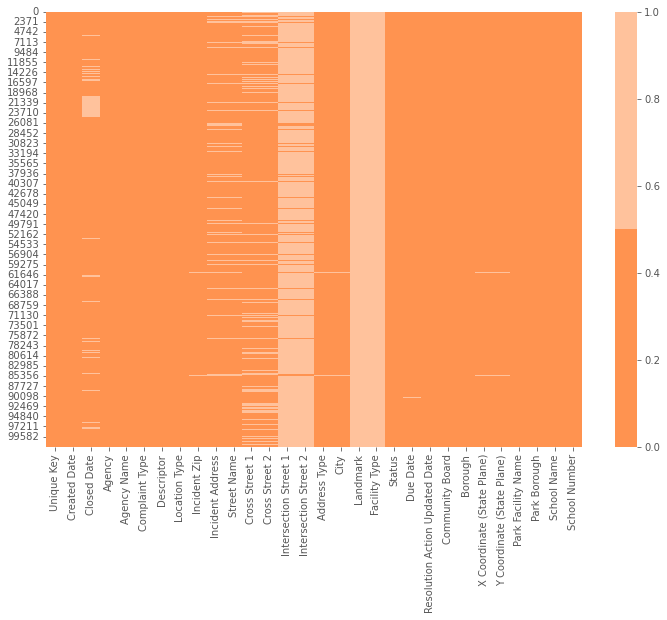

In [4]:
# heatmap of any missing data
cols = data.columns[:30] # my first 30 columns
colours = ['#ff9350', '#ffc29c'] # pink is missing. orange is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
# Try out a missing data percentage list! 
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<AxesSubplot:xlabel='index'>

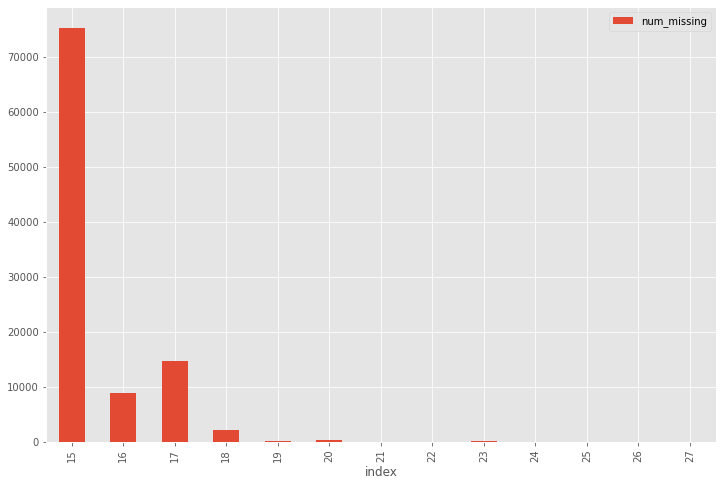

In [6]:
# Plot a missing data histogram

# first create missing indicator for features with missing data
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

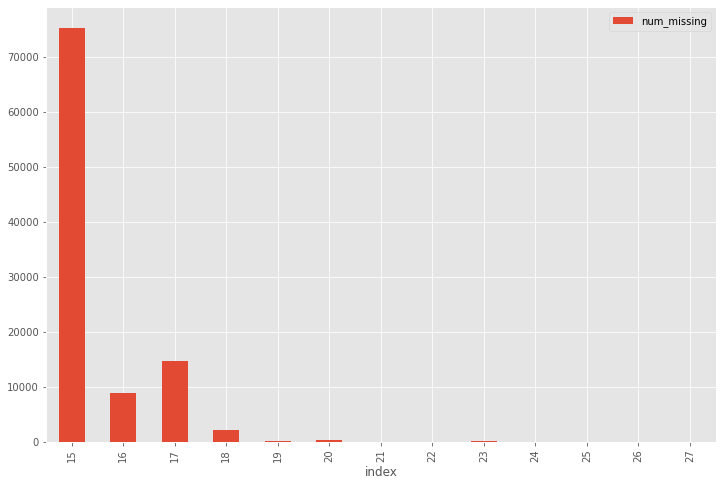

In [7]:
delete_these = data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [8]:
# Handle any missing data in your dataframe.
#I am going to drop dolumns that have more than 90% missing data from the missing percentage data list above.
cols_to_drop = ['Intersection Street 1','Intersection Street 2','Landmark','Facility Type','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name']
data_less_missing_data_columns = data.drop(cols_to_drop, axis=1)
data = data_less_missing_data_columns
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,True,True,True,True,True,True,False,False,False,17
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,True,True,True,True,True,True,False,False,False,17
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,True,True,True,True,True,True,False,False,False,16
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,True,True,True,True,True,True,False,False,False,15
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,True,True,True,True,True,True,False,False,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,...,True,True,True,True,True,True,False,False,False,15
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233.0,829 HALSEY STREET,...,True,True,True,True,True,True,False,False,False,17
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,...,True,True,True,True,True,True,False,False,False,15
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105.0,22-68 46 STREET,...,True,True,True,True,True,True,False,False,False,15


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

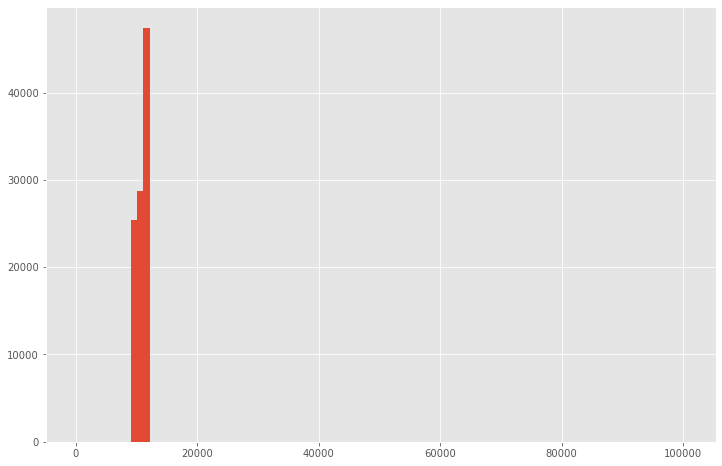

In [9]:
# Plot a histogram to see if there are any outliers.
data['Incident Zip'].hist(bins=100)

In [10]:
# Use the describe() method
#this did not help much
data.describe()


,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,num_missing
count,1.019140e+05,101578.000000,1.012080e+05,101208.000000,101208.000000,101208.000000,101914.000000
mean,2.815864e+07,10728.680895,1.002473e+06,208639.988953,40.739304,-73.934206,15.491974
std,6.015376e+06,631.206648,1.958043e+04,29956.193531,0.082224,0.070617,0.996092
min,1.146439e+07,83.000000,9.134950e+05,121350.000000,40.499502,-74.254437,15.000000
25%,2.341452e+07,10086.250000,9.936100e+05,186934.000000,40.679740,-73.966216,15.000000
50%,2.883680e+07,10472.000000,1.001398e+06,203425.500000,40.725009,-73.938112,15.000000
75%,3.346014e+07,11222.000000,1.011951e+06,236364.000000,40.815428,-73.899963,16.000000
max,3.719700e+07,100354.000000,1.066922e+06,271876.000000,40.912869,-73.701632,27.000000


<AxesSubplot:>

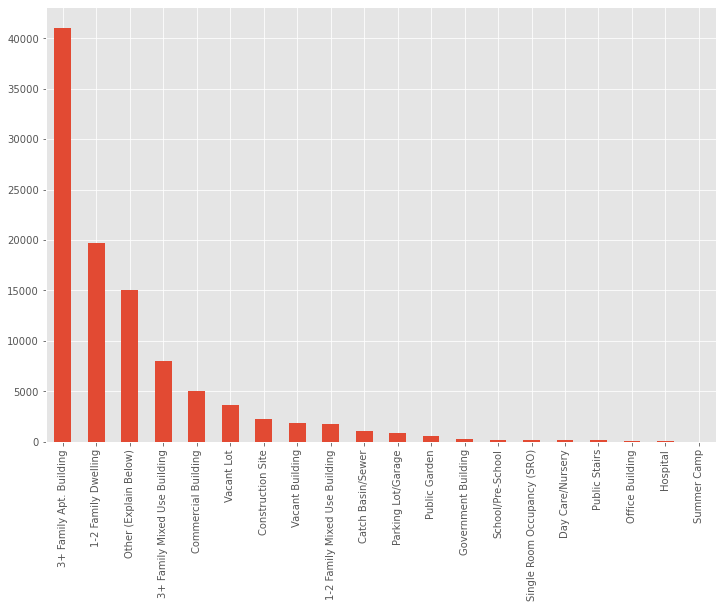

In [11]:
# Plot a bar chart
data['Location Type'].value_counts().plot.bar()

In [12]:
data = data.dropna(axis = 1, how = 'all')

In [13]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude', 'Location', 'Closed Date_ismissing',
       'Location Type_ismissing', 'Incident Zip_ismissing',
       'Incident Address_ismissing', 'Street Name_ismissing',
       'Cross Street 1_ismissing', 'Cross Street 2_ismissing',
       'Intersection Street 1_ismissing', 'Intersection Street 2_ismissing',
       'Address Type_i

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

<AxesSubplot:>

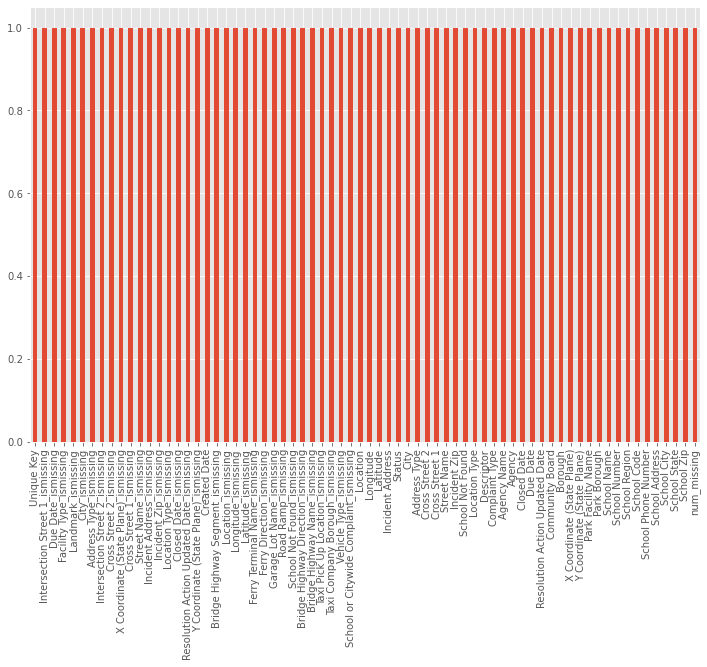

In [14]:
# Handle any outliers in your dataframe
data.columns.value_counts().plot.bar()

<AxesSubplot:>

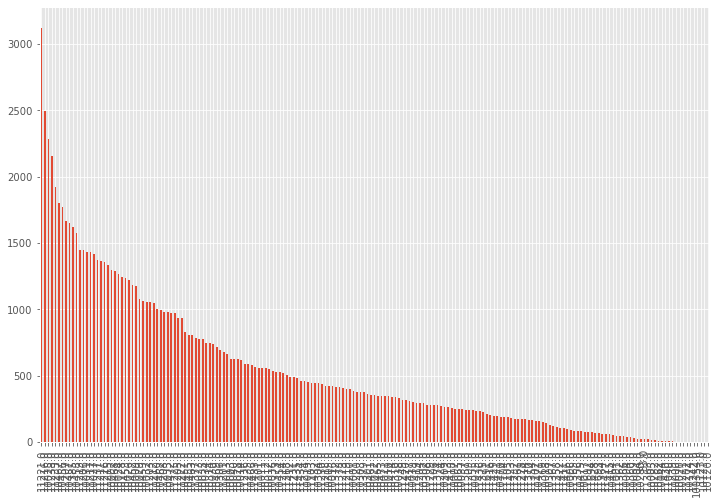

In [15]:
data['Incident Zip'].value_counts().plot.bar()

In [16]:
data['Incident Zip'].describe()

count    101578.000000
mean      10728.680895
std         631.206648
min          83.000000
25%       10086.250000
50%       10472.000000
75%       11222.000000
max      100354.000000
Name: Incident Zip, dtype: float64

<AxesSubplot:>

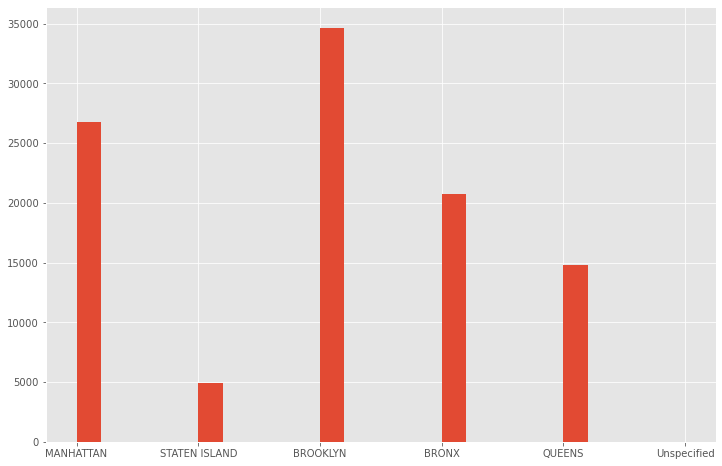

In [17]:
data['Borough'].hist(bins=25)

In [18]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,num_missing
count,1.019140e+05,101578.000000,1.012080e+05,101208.000000,101208.000000,101208.000000,101914.000000
mean,2.815864e+07,10728.680895,1.002473e+06,208639.988953,40.739304,-73.934206,15.491974
std,6.015376e+06,631.206648,1.958043e+04,29956.193531,0.082224,0.070617,0.996092
min,1.146439e+07,83.000000,9.134950e+05,121350.000000,40.499502,-74.254437,15.000000
25%,2.341452e+07,10086.250000,9.936100e+05,186934.000000,40.679740,-73.966216,15.000000
50%,2.883680e+07,10472.000000,1.001398e+06,203425.500000,40.725009,-73.938112,15.000000
75%,3.346014e+07,11222.000000,1.011951e+06,236364.000000,40.815428,-73.899963,16.000000
max,3.719700e+07,100354.000000,1.066922e+06,271876.000000,40.912869,-73.701632,27.000000


<AxesSubplot:>

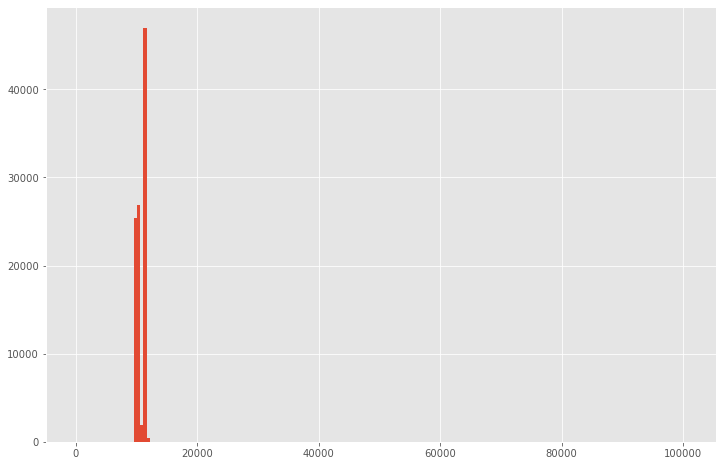

In [19]:
data['Incident Zip'].hist(bins=200)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [20]:
# Look for any irrelevant data in the dataframe. How will you handle it?
#Agency Name,Agency,Descriptor,Complaint Type
num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Agency: 100.00000%
DOHMH    101914
Name: Agency, dtype: int64

Agency Name: 100.00000%
Department of Health and Mental Hygiene    101914
Name: Agency Name, dtype: int64

Complaint Type: 100.00000%
Rodent    101914
Name: Complaint Type, dtype: int64

Descriptor: 100.00000%
Rat Sighting    101914
Name: Descriptor, dtype: int64

Park Facility Name: 100.00000%
Unspecified    101914
Name: Park Facility Name, dtype: int64

School Name: 100.00000%
Unspecified    101914
Name: School Name, dtype: int64

School Number: 100.00000%
Unspecified    101914
Name: School Number, dtype: int64

School Region: 100.00000%
Unspecified    101914
Name: School Region, dtype: int64

School Code: 100.00000%
Unspecified    101914
Name: School Code, dtype: int64

School Phone Number: 100.00000%
Unspecified    101914
Name: School Phone Number, dtype: int64

School Address: 100.00000%
Unspecified    101914
Name: School Address, dtype: int64

School City: 100.00000%
Unspecified    101914
Name: School City, dtype: int

In [25]:
#delete comumns that are duplicated
columns = ['Agency Name', 'Complaint Type']
data.drop(columns, inplace=True, axis=1)


KeyError: "['Agency Name' 'Complaint Type'] not found in axis"

In [26]:
data.info

<bound method DataFrame.info of         Unique Key            Created Date             Closed Date Agency  \
0         31464015  09/04/2015 12:00:00 AM  09/18/2015 12:00:00 AM  DOHMH   
1         31464024  09/04/2015 12:00:00 AM  10/28/2015 12:00:00 AM  DOHMH   
2         31464025  09/04/2015 12:00:00 AM                     NaN  DOHMH   
3         31464026  09/04/2015 12:00:00 AM  09/14/2015 12:00:00 AM  DOHMH   
4         31464027  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM  DOHMH   
...            ...                     ...                     ...    ...   
101909    35494908  02/15/2017 12:00:00 AM  01/31/2017 12:00:00 AM  DOHMH   
101910    35494944  02/14/2017 12:00:00 AM  02/23/2017 12:00:00 AM  DOHMH   
101911    35494945  02/14/2017 12:00:00 AM  02/16/2017 12:00:00 AM  DOHMH   
101912    35494970  02/14/2017 12:00:00 AM  01/17/2017 12:00:00 AM  DOHMH   
101913    35502334  02/15/2017 04:39:49 AM                     NaN  DOHMH   

          Descriptor                 Locati

In [34]:
# Look for duplicates. How will you handle any duplicates?
key = ['Location Type', 'Incident Zip', 'Incident Address', 'Street Name']

data.fillna(-999).groupby(key)['Unique Key'].count().sort_values(ascending=False).head(20)

#i could definitly use some help here for duplicates and getting a better understanding

Location Type            Incident Zip  Incident Address     Street Name    
Other (Explain Below)     10025.0      -999                 -999               180
3+ Family Apt. Building   10462.0      2131 WALLACE AVENUE  WALLACE AVENUE     167
                          11238.0      95 EASTERN PARKWAY   EASTERN PARKWAY    158
Other (Explain Below)     10024.0      -999                 -999               127
                          10128.0      -999                 -999               102
3+ Family Apt. Building   11203.0      651 BROOKLYN AVENUE  BROOKLYN AVENUE     96
Other (Explain Below)     11385.0      -999                 -999                94
                          10002.0      -999                 -999                88
3+ Family Apt. Building   10468.0      2486 DAVIDSON AVE    DAVIDSON AVE        88
Other (Explain Below)     10027.0      -999                 -999                83
                          11238.0      -999                 -999                78
           

In [31]:
data[data.duplicated(['Unique Key'], keep=False)]

,Unique Key,Created Date,Closed Date,Agency,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
#quite a bit of this data is uninformative, the missing data alone is quite large. With these I would typically delete if all info is missing, however if there are some rows ill leave them. 

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [38]:
# Try to convert all the strings in a column to lower or upper case. 
data['Incident Address'].value_counts(dropna=False).head(30).sort_index()
#just from a quick look I can see that 2486 davidson ave and avenue should be changed. Possibly go through all drives, avenues, streets, parways and make them cohesive.

101 LINCOLN ROAD           51
1025 BOYNTON AVENUE        65
1079 DEKALB AVENUE         42
111 EAST 26 STREET         33
1201 OCEAN PARKWAY         47
1248 ST MARKS AVENUE       43
153 NORFOLK STREET         41
1706 GATES AVENUE          34
2131 WALLACE AVENUE       186
229 WEST 109 STREET        44
230 WEST 107 STREET        39
237 CARROLL STREET         35
2486 DAVIDSON AVE          88
2486 DAVIDSON AVENUE       39
456 WEST 47 STREET         33
46-01 67 STREET            51
551 WEST 204TH STREET      46
570 W 204TH ST             46
651 BROOKLYN AVENUE       127
666 WEST END AVENUE        38
70 LEFFERTS PLACE          34
70-15 65 PLACE             34
750 GRAND CONCOURSE        39
770 BRYANT AVENUE          39
80 NEW YORK AVENUE         39
95 EASTERN PARKWAY        176
DEAN STREET                38
EAST 93 STREET             36
PUTNAM AVENUE              36
NaN                      9074
Name: Incident Address, dtype: int64

In [49]:
# data['Incident Address'] = data['Incident Address'].str.upper()
# data["Incident Address"].replace("AVE", "AVENUE", regex=True)
# data["Incident Address"].replace("ST", "STREET", regex=True)
# data["Incident Address"].replace("PL", "PLACE", regex=True)
# data["Incident Address"].replace("DR", "DRIVE", regex=True)

# data.replace(regex=['AVE'], value='AVENUE')

data["Incident Address"]= data["Incident Address"].str.replace("AVENUE", "AVE", case = False)
data["Incident Address"]= data["Incident Address"].str.replace("STREET", "ST", case = False)

In [50]:
data['Incident Address'].value_counts(dropna=False).head(30).sort_index()

101 LINCOLN ROAD         51
1025 BOYNTON AVE         65
1079 DEKALB AVE          42
111 EAST 26 ST           33
1201 OCEAN PARKWAY       47
1248 ST MARKS AVE        43
153 NORFOLK ST           41
1706 GATES AVE           34
2131 WALLACE AVE        186
229 WEST 109 ST          44
230 WEST 107 ST          39
237 CARROLL ST           35
2486 DAVIDSON AVE       127
456 WEST 47 ST           33
46-01 67 ST              51
551 WEST 204TH ST        46
570 W 204TH ST           46
651 BROOKLYN AVE        127
666 WEST END AVE         38
70 LEFFERTS PLACE        34
70-15 65 PLACE           34
750 GRAND CONCOURSE      39
770 BRYANT AVE           39
80 NEW YORK AVE          39
879 DEKALB AVE           35
95 EASTERN PARKWAY      176
DEAN ST                  38
EAST 93 ST               36
PUTNAM AVE               36
NaN                    9074
Name: Incident Address, dtype: int64